# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 565


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/onecall?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = # YOUR CODE HERE
        city_lng = # YOUR CODE HERE
        city_max_temp = # YOUR CODE HERE
        city_humidity = # YOUR CODE HERE
        city_clouds = # YOUR CODE HERE
        city_wind = # YOUR CODE HERE
        city_country = # YOUR CODE HERE
        city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faya
Processing Record 2 of Set 1 | farsund
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | lanzhou
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | saint-pierre
Processing Record 12 of Set 1 | colorado
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | trairi
Processing Record 15 of Set 1 | dobryanka
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | avarua
Processing Record 23 of

Processing Record 33 of Set 4 | belmonte
Processing Record 34 of Set 4 | pisco
Processing Record 35 of Set 4 | ambilobe
Processing Record 36 of Set 4 | aripuana
Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | warqla
City not found. Skipping...
Processing Record 39 of Set 4 | lesnoy
Processing Record 40 of Set 4 | evensk
Processing Record 41 of Set 4 | sur
Processing Record 42 of Set 4 | la ronge
Processing Record 43 of Set 4 | danielskuil
Processing Record 44 of Set 4 | chunhuhub
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | ouallam
Processing Record 47 of Set 4 | challapata
Processing Record 48 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 49 of Set 4 | olafsvik
Processing Record 0 of Set 5 | neepawa
Processing Record 1 of Set 5 | freetown
Processing Record 2 of Set 5 | nome
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | ugra
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
#for i, city in enumerate(cities[:5]):      
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | tagiura
Processing Record 8 of Set 1 | saint-denis
Processing Record 9 of Set 1 | constantia
Processing Record 10 of Set 1 | ahau
City not found. Skipping...
Processing Record 11 of Set 1 | waingapu
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | howard springs
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | arkhangel'sk
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | chamical
Processing Record 21 of Set 1 | ribeira grande
Pro

Processing Record 39 of Set 4 | reggane
Processing Record 40 of Set 4 | pacific grove
Processing Record 41 of Set 4 | adiake
Processing Record 42 of Set 4 | geraldton
Processing Record 43 of Set 4 | magadan
Processing Record 44 of Set 4 | dibba al-hisn
Processing Record 45 of Set 4 | yanji
Processing Record 46 of Set 4 | viedma
Processing Record 47 of Set 4 | east london
Processing Record 48 of Set 4 | flin flon
Processing Record 49 of Set 4 | ust'-uda
Processing Record 0 of Set 5 | turpan
Processing Record 1 of Set 5 | helena valley west central
Processing Record 2 of Set 5 | lompoc
Processing Record 3 of Set 5 | rudnichnyy
Processing Record 4 of Set 5 | tura
Processing Record 5 of Set 5 | enewetak
Processing Record 6 of Set 5 | el bayadh
Processing Record 7 of Set 5 | cannonvale
Processing Record 8 of Set 5 | vadso
Processing Record 9 of Set 5 | ivdel'
Processing Record 10 of Set 5 | progreso
Processing Record 11 of Set 5 | santa ana
Processing Record 12 of Set 5 | kone
Processing Re

Processing Record 32 of Set 8 | vilyuchinsk
Processing Record 33 of Set 8 | aykhal
Processing Record 34 of Set 8 | mallammaduri
Processing Record 35 of Set 8 | gornozavodsk
Processing Record 36 of Set 8 | oamaru
Processing Record 37 of Set 8 | abbeville
Processing Record 38 of Set 8 | sechura
Processing Record 39 of Set 8 | hamilton
Processing Record 40 of Set 8 | malvan
Processing Record 41 of Set 8 | twon-brass
Processing Record 42 of Set 8 | cuenca
Processing Record 43 of Set 8 | maricopa
Processing Record 44 of Set 8 | villa alberto andres alvarado aramburo
City not found. Skipping...
Processing Record 45 of Set 8 | krasnoturansk
Processing Record 46 of Set 8 | holualoa
Processing Record 47 of Set 8 | barcarena
Processing Record 48 of Set 8 | zheshart
Processing Record 49 of Set 8 | puerto deseado
Processing Record 0 of Set 9 | pisco
Processing Record 1 of Set 9 | mirnyy
Processing Record 2 of Set 9 | uaua
Processing Record 3 of Set 9 | lerwick
Processing Record 4 of Set 9 | port g

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,0.92,97,92,0.80,CL,1694212281
1,adamstown,-25.0660,-130.1015,19.62,81,100,7.32,PN,1694212554
2,cabo san lucas,22.8909,-109.9124,34.78,66,0,8.23,MX,1694212406
3,kodiak,57.7900,-152.4072,11.73,71,75,5.66,US,1694212555
4,margaret river,-33.9500,115.0667,15.10,80,11,5.22,AU,1694212415


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,0.92,97,92,0.80,CL,1694212281
1,adamstown,-25.0660,-130.1015,19.62,81,100,7.32,PN,1694212554
2,cabo san lucas,22.8909,-109.9124,34.78,66,0,8.23,MX,1694212406
3,kodiak,57.7900,-152.4072,11.73,71,75,5.66,US,1694212555
4,margaret river,-33.9500,115.0667,15.10,80,11,5.22,AU,1694212415


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

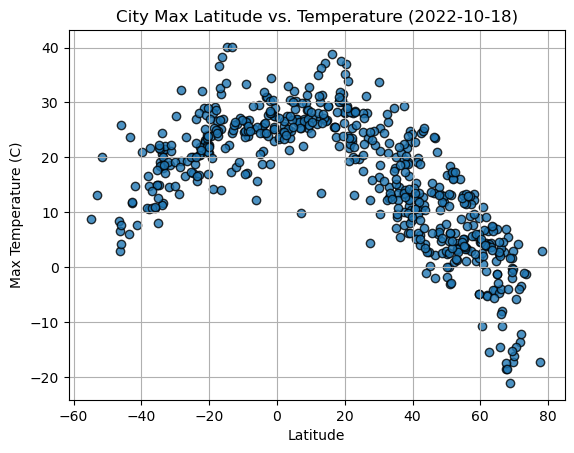

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

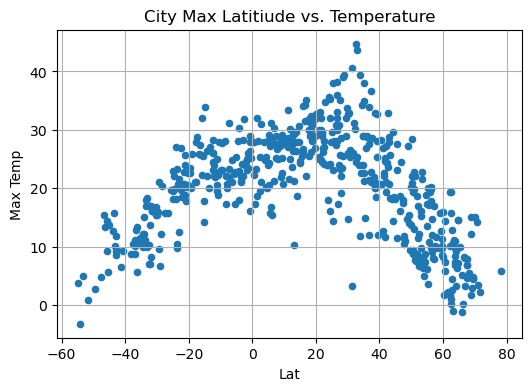

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")


# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(6,4),
              title="City Max Latitiude vs. Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

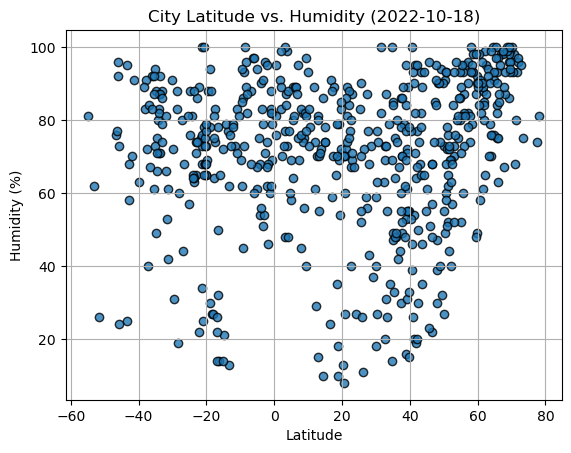

In [9]:
# Build the scatter plots for latitude vs. humidity


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

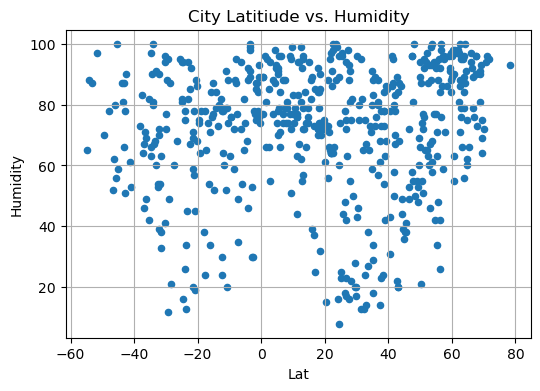

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")

# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(6,4),
              title="City Latitiude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

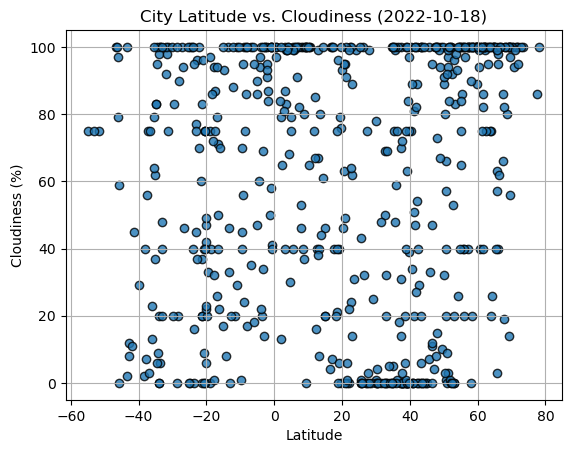

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")

# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(6,4),
              title="City Latitiude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

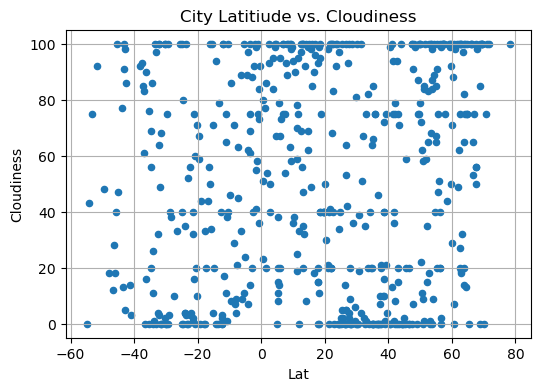

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("float")


# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(6,4),
              title="City Latitiude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

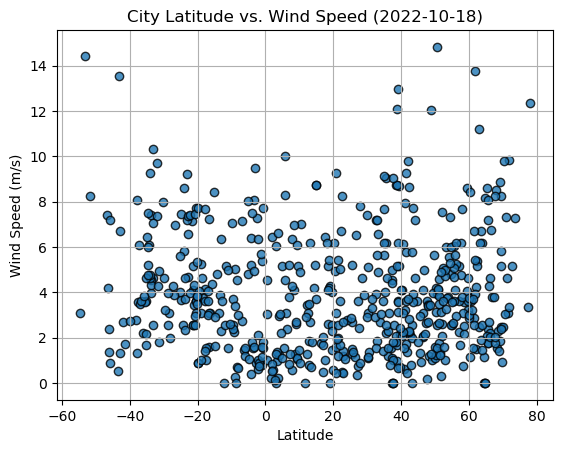

In [11]:
# Build the scatter plots for latitude vs. wind speed


# Incorporate the other graph properties


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

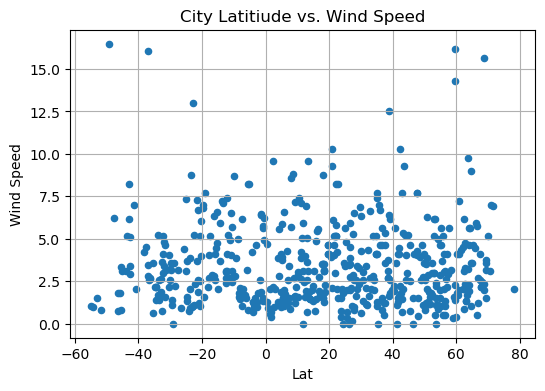

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")


# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(6,4),
              title="City Latitiude vs. Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


In [34]:

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df ['Lat'] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,cabo san lucas,22.8909,-109.9124,34.78,66,0,8.23,MX,1694212406
3,kodiak,57.7900,-152.4072,11.73,71,75,5.66,US,1694212555
5,tagiura,32.8817,13.3506,25.37,67,1,6.61,LY,1694212555
6,saint-denis,48.9167,2.3333,27.30,55,0,2.57,FR,1694212555
7,constantia,44.1833,28.6500,14.38,49,0,4.04,RO,1694212556


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df ['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,0.92,97,92,0.80,CL,1694212281
1,adamstown,-25.0660,-130.1015,19.62,81,100,7.32,PN,1694212554
4,margaret river,-33.9500,115.0667,15.10,80,11,5.22,AU,1694212415
8,waingapu,-9.6567,120.2641,23.18,76,8,2.79,ID,1694212556
9,kruisfontein,-34.0033,24.7314,12.25,81,26,1.69,ZA,1694212556


###  Temperature vs. Latitude Linear Regression Plot

In [38]:
x_values

City_ID
2      22.8909
3      57.7900
5      32.8817
6      48.9167
7      44.1833
        ...   
533    37.6775
534    53.6524
536    28.3667
537    36.0307
541    31.5023
Name: Lat, Length: 372, dtype: float64

The r-value is: 0.7161472181434118


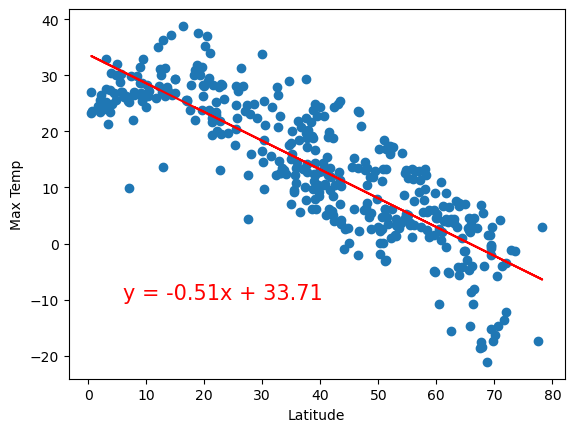

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [52]:
# Linear regression on Northern Hemisphere

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept
# # Create Plot
# plt.scatter(x_values,y_values)
# plt.plot(x_values,northern_hemi_df,"r-")

# # Label plot and annotate the line equation
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.annotate(line_eq,(20,5),fontsize=15,color="red")

#Print r value
# print(f"The r-value is: {rvalue**2}")

# # Show plot
# plt.show()

# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Create Plot
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))
plt.show()

NameError: name 'slope' is not defined

The r-value is: 0.4121057168607245


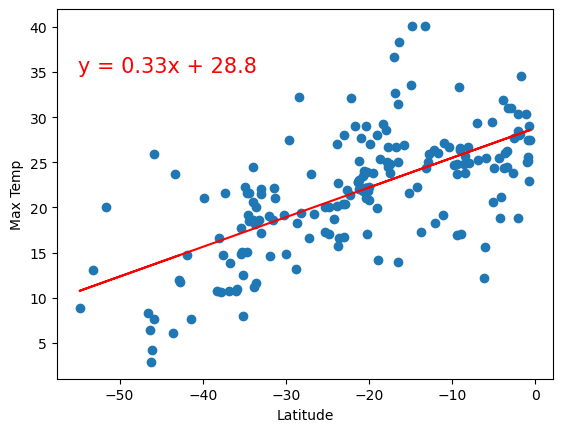

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.6515440244598787


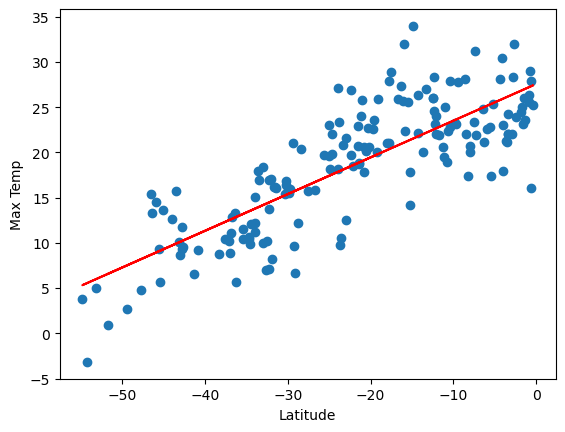

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Create Plot
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


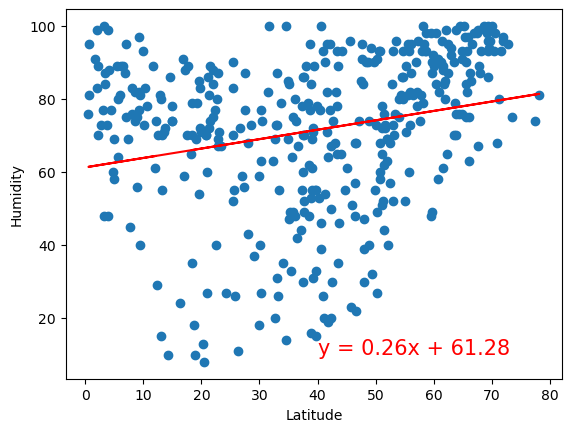

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.005024426989039324


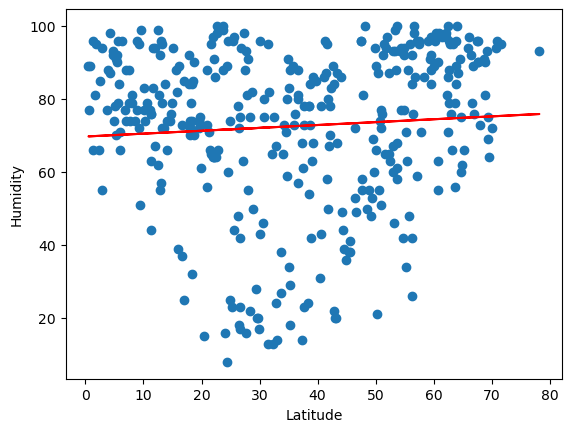

In [40]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Create Plot
plot_linear_regression(x_values, y_values, "Humidity",(6,-10))
plt.show()

The r-value is: 0.0002808747046324607


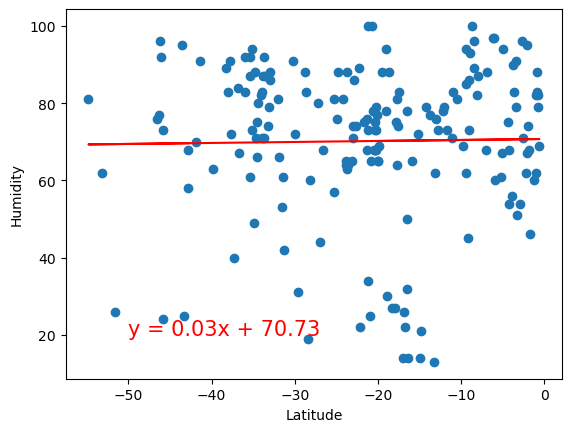

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0020325148259283258


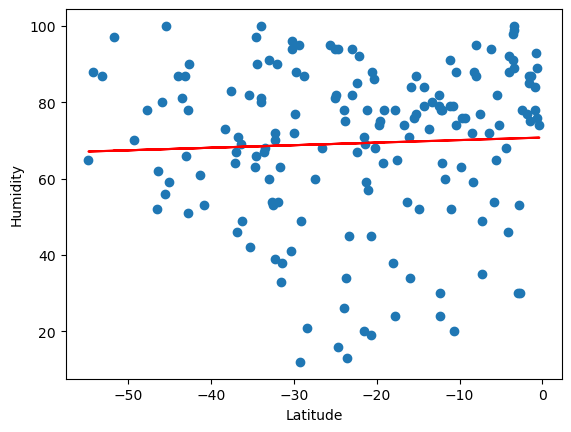

In [41]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Create Plot
plot_linear_regression(x_values, y_values, "Humidity",(6,-10))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


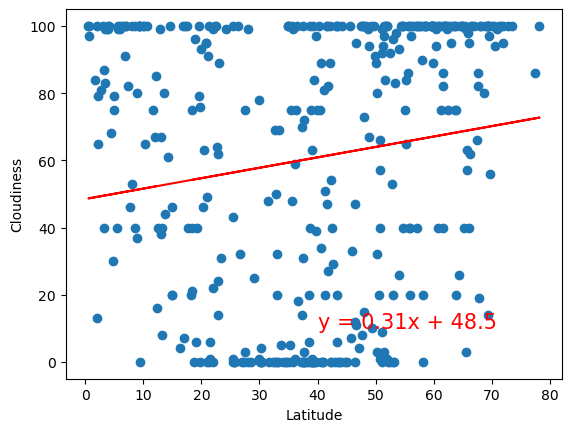

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.00346823197627486


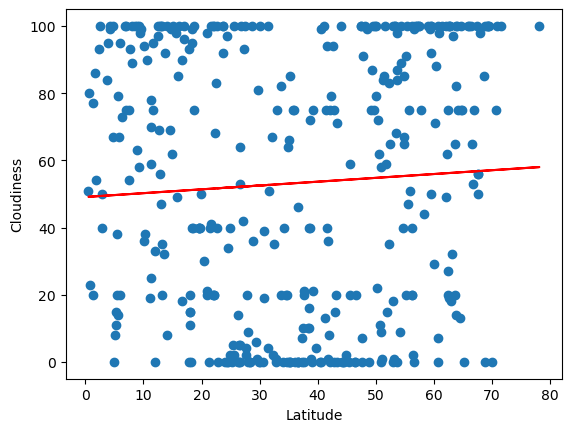

In [42]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Create Plot
plot_linear_regression(x_values, y_values, "Cloudiness",(6,-10))
plt.show()

The r-value is: 0.02056735429994368


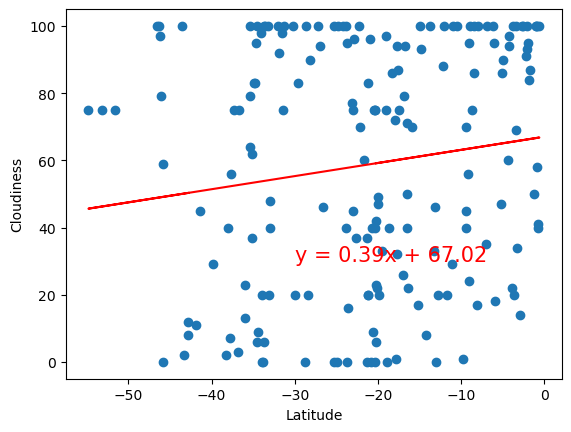

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.004272173460568536


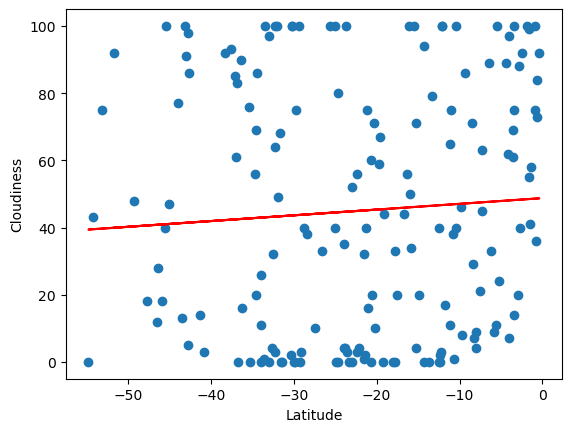

In [43]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Create Plot
plot_linear_regression(x_values, y_values, "Cloudiness",(6,-10))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


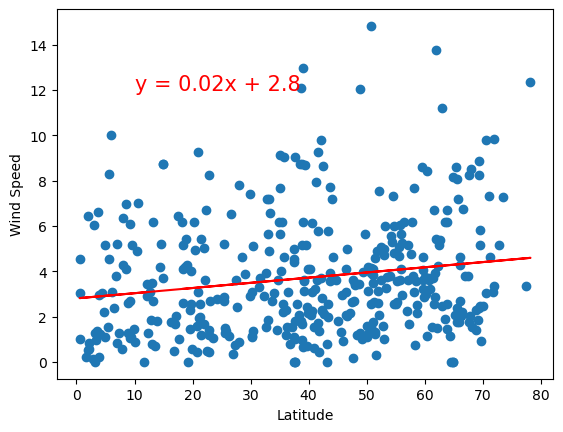

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0021878070521206424


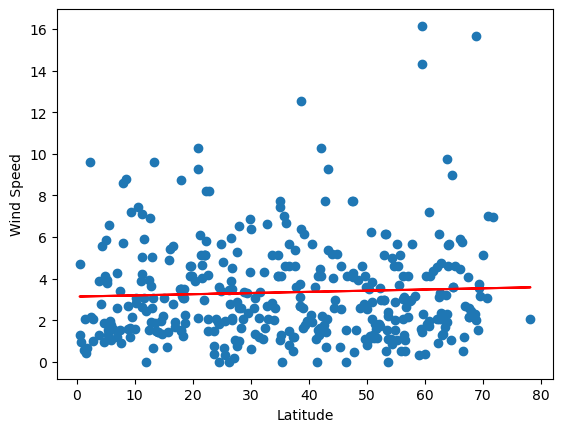

In [44]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Create Plot
plot_linear_regression(x_values, y_values, "Wind Speed",(6,-10))
plt.show()

The r-value is: 0.062239040700515696


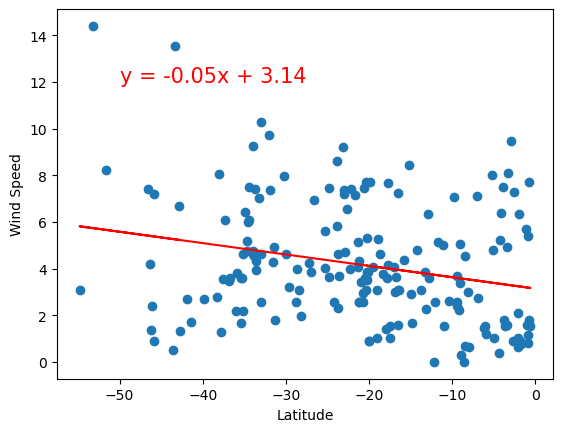

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.00011971178209085499


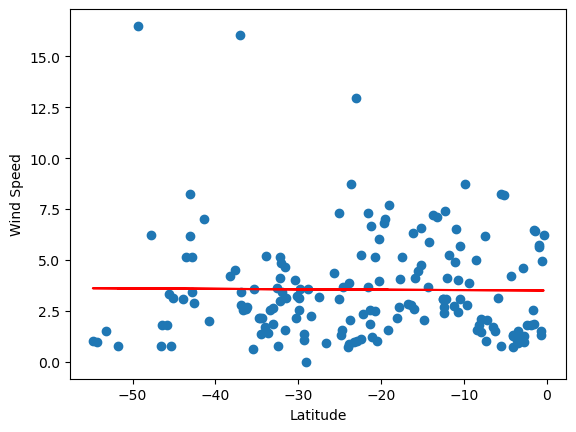

In [45]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Create Plot
plot_linear_regression(x_values, y_values, "Wind Speed",(6,-10))
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE